## Natural Language Processing Example

### Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import itertools
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier


try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec
    
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec
    
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

    
import re
from collections import Counter
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pingwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import data and cleaning

In [2]:
def replaceHtmlCode(row):
    toReplace = row['text']
    if re.search('&quot', toReplace):
        toReplace = re.sub('&quot', '"', toReplace)
    elif re.search('&amp', toReplace):
        toReplace = re.sub('&amp', '&', toReplace)
    elif re.search('&apos', toReplace):
        toReplace = re.sub('&apos', "'", toReplace)
    elif re.search('&lt', toReplace):
        toReplace = re.sub('&lt', '<', toReplace)
    elif re.search('&gt', toReplace):
        toReplace = re.sub('&gt', '>', toReplace)
    return toReplace

In [3]:
def stemTweetToWordList(row, stopWords):
    tweet = row['text'].lower() # lower case
    tokenizer = RegexpTokenizer(r'\w+')  
    wordList = tokenizer.tokenize(tweet)
    wordsRmStop = [word for word in wordList if word not in stopWords] # remove stop words
    ps = PorterStemmer()
    return [ps.stem(word) for word in wordsRmStop] # stem 

In [4]:
def countWords(dataFrame, colName):
    buildDict = {}
    for index, row in dataFrame.iterrows():
        textList = row[colName]
        for word in textList:
            if word in buildDict:
                buildDict[word] += 1
            else:
                buildDict[word] = 1
    return buildDict

In [5]:
genericTweets = pd.read_csv("generic_tweets.txt", low_memory = False, encoding='utf-8')
# replace html code with ascii equivalent
genericTweets['text'] = genericTweets.apply(lambda row: replaceHtmlCode(row), axis=1)
# remove any nonascii characters
#genericTweets['text'] = genericTweets.apply(lambda row: row['text'].encode("ascii", errors="ignore").decode(), axis=1)
# remove URLs
genericTweets['text'] = genericTweets['text'].str.replace('http\S+|www.\S+|\\\\n', \
                                                          ' ', case=False, regex=True)

In [6]:
CADElection = pd.read_csv("Canadian_elections_2019.csv", low_memory = False, encoding='utf-8')

# replace html code with ascii equivalent
CADElection['text'] = CADElection.apply(lambda row: replaceHtmlCode(row), axis=1)
# remove URLs
CADElection['text'] = CADElection['text'].str.replace('http\S+|www.\S+|\\\\n', \
                                                      ' ', case=False, regex=True)
# remove the first two letters b'
CADElection['text'] = CADElection['text'].str[2:]
# # remove hex decimal representation 
CADElection['text'] = CADElection['text'].str.replace(r'\\[x][a-zA-Z0-9_][a-z0-9_]|\\', \
                                                      '', case=False, regex=True)

The stop word extension from nltk stop word lists is based on the inspection on the tweets under study. Word frequency dictionary is built, and find out these words can be added to the stop word list.

In [7]:
stop = stopwords.words('english')
stopWords = pd.read_csv("stop_words.txt", low_memory = False, names=['stop_words'])
stop.extend(stopWords['stop_words'].tolist())
stop = set(stop)
genericStopExtension = list(stop) + ['day','lol','2','3','haha','yeah','hey','4','days',\
                                     'dont','cant','@','1','sure','man','<','yay','5','ur',\
                                     'finally','wow','bit','omg']
CADElectionStop = list(stop) + ['days', 'day', 'help', 'monday', 'cdnpoli','elxn43', \
                                'vote', 'campaign', 'canada','canadians','party', 'election', \
                                'time', 'voting', 'elxn2019', 'support']

In [ ]:
genericTweets['text_mod_list'] = genericTweets.apply(lambda row: stemTweetToWordList(row, genericStopExtension), axis=1)


In [ ]:
CADElection['text_mod_list'] = CADElection.apply(lambda row: stemTweetToWordList(row, CADElectionStop), axis=1)

In [ ]:
buildDict = countWords(CADElection, 'text_mod_list')
listToSort = []
for key in buildDict.keys():
    listToSort.append((buildDict[key], key))
listToSort = sorted(listToSort, reverse=True)
print('top 15 words from Canadian Election File')
print(listToSort[:15])

top 15 words from Canadian Election File
[(226, 'scheer'), (200, 'trudeau'), (198, 'conserv'), (198, 'andrewsch'), (170, 'liber'), (164, 'chooseforward'), (163, 'ndp'), (157, 'cpc'), (152, 'peopl'), (135, 'justintrudeau'), (117, 'lie'), (114, 'kinsella'), (111, 'candid'), (110, 'polit'), (99, 'cpc_hq')]


In [ ]:
buildDictGeneric = countWords(genericTweets, 'text_mod_list')
listToSortGeneric = []
for key in buildDictGeneric.keys():
    listToSortGeneric.append((buildDictGeneric[key], key))
listToSortGeneric = sorted(listToSortGeneric, reverse=True)
print('top 15 words from generic tweets file')
print(listToSortGeneric[:15])

top 15 words from generic tweets file
[(11951, 'good'), (11902, 'work'), (10127, 'love'), (8951, 'today'), (8525, 'time'), (8481, 'go'), (6346, 'feel'), (6308, 'night'), (5694, 'hope'), (5439, 'watch'), (5430, 'well'), (5392, 'morn'), (5347, 'twitter'), (5006, 'sleep'), (4507, 'great')]


In [ ]:
# translator = str.maketrans('//!"#$%&\'()*+,-.:;=?[]^_`{|}~', ' '*len('//!"#$%&\'()*+,-.:;=?[]^_`{|}~')) #map punctuation to space
# CADElection['text_mod'] = CADElection.apply(lambda row: row['text'].translate(translator) ,axis=1)
# genericTweets['text_mod'] = genericTweets.apply(lambda row: row['text'].translate(translator) ,axis=1)
# CADElection['text_mod_list'] = CADElection['text_mod'].str.split()
# CADElection['text_mod_list'] = CADElection['text_mod_list'].apply(lambda x: [item for item in x if item not in CADElectionStop])
# genericTweets['text_mod_list'] = genericTweets['text_mod'].str.split()
# genericTweets['text_mod_list'] = genericTweets['text_mod_list'].apply(lambda x: [item for item in x if item not in genericStopExtension])
# genericTweets['modi_tweet'] = genericTweets['text_mod_list'].apply(lambda x: ' '.join(x))
# CADElection['modi_tweet'] = CADElection['text_mod_list'].apply(lambda x: ' '.join(x))


In [ ]:
CADElectionCopy = CADElection.drop(['text'], axis=1)
genericTweetsCopy = genericTweets.drop(['text'], axis=1)

The keywords that are used to distinguish the parties are from the word frequencies generated from the cell below.

In [ ]:
conservative = ['scheer', '@andrewscheer', 'andrewscheer','cpc', '@cpc', 'conservative', 'conservatives', \
                'andrew','andy','scheer4pm', 'scheers'\
                'trudeaumustgo', 'trudeauworstpm']

liberal = ['trudeau', 'chooseforward', 'liberal','climate', 'liberals', 'justin', '@liberal', 'lpc', \
           'chooseforwardwithtrudeau','teamtrudeau', 'voteliberal','climatechange','climateaction',\
           'scheerlies', 'scheerdisaster', 'scheerhypocrisy', 'stopscheer', 'lyingandy',\
           'kinsella', 'kinsellagate']

ndp = ['ndp', '@thejagmeetsingh', 'uprisingh', '@ndp', 'singh', 'jagmeet', 'jagmeetsingh']
ppc = ['ppc', '@maximebernier', 'bernier', 'ppc2019', '@peoplespca', 'maxime', 'voteppc', 'maximebernier', 'peoplespartyofcanada']
green = ['green', '@canadiangreens', 'greens', 'elizabethmay','elizabeth']
partyName = ['conservative', 'liberal', 'ndp', 'ppc', 'green', 'others']


In [ ]:
def classifyParty(sentiment, tweetWordList, partyName):
    """
    The algorithm of classifying the tweets is to count the words that shown in each party's list, and at the end of 
    the counting process, if the sentiment is positive, then the counts keep it as what it is, and if the sentiment 
    is negative, then all the counts are times minus 1. The party that corresponds to the maximum value is assigned 
    to the tweet. If in the case of a tie, then it is assigned to the party that is more popular. The popularity order
    is below conservative, liberal, ndp, ppc, green, and others. If in the case that none of the party has a count, then
    this tweet is assigned to others.
    """
    
    count = np.zeros(6)
    for word in tweetWordList:
        if word in conservative:
            count[0] += 1
        elif word in liberal:
            count[1] += 1
        elif word in ndp:
            count[2] += 1
        elif word in ppc:
            count[3] += 1
        elif word in green:
            count[4] += 1

    if max(count)==0:
        return partyName[5]
    
    if sentiment == 'negative':
        count = count * -1
    maxIdx = 0
    for i in range(1, len(count)-1):
        if count[i] > count[maxIdx]:
            maxIdx = i
    #print(count)
    #if maxIdx == 5:
    #    print(row['sentiment'], row['text_mod_list'])
    return partyName[maxIdx]

In [ ]:
partyCount = {}
for name in partyName:
    partyCount[name] = 0
    
for index, row in CADElectionCopy.iterrows():
    partyCount[classifyParty(row['sentiment'], row['text_mod_list'], partyName)] += 1
print('total number of tweets analyzed %d' %CADElectionCopy.shape[0])
print('the number of tweets that belong to each party')
print(partyCount)

total number of tweets analyzed 2133
the number of tweets that belong to each party
{'conservative': 360, 'liberal': 321, 'ndp': 184, 'ppc': 45, 'green': 31, 'others': 1192}


The plot below shows that liberal and conservatives are very close, and followed by ndp, people's party and green party. However, 1192 tweets are assigned as others. BlocQuebecois does not appear too often (around 25 times in the tweets), this is probably becaue the tweets are English dominant, and most of the people in Quebec are Francophone.

Text(0.5, 1.0, 'Distribution of the political tweets')

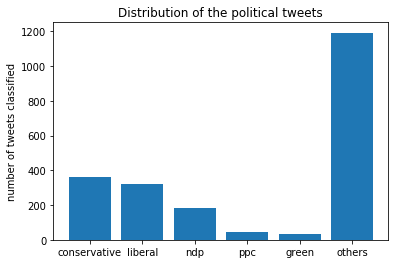

In [ ]:
x = Counter(partyCount)
l = range(len(x.keys()))
plt.bar(l, x.values(), align='center')
plt.xticks(l, x.keys())
plt.ylabel('number of tweets classified')
plt.title('Distribution of the political tweets')

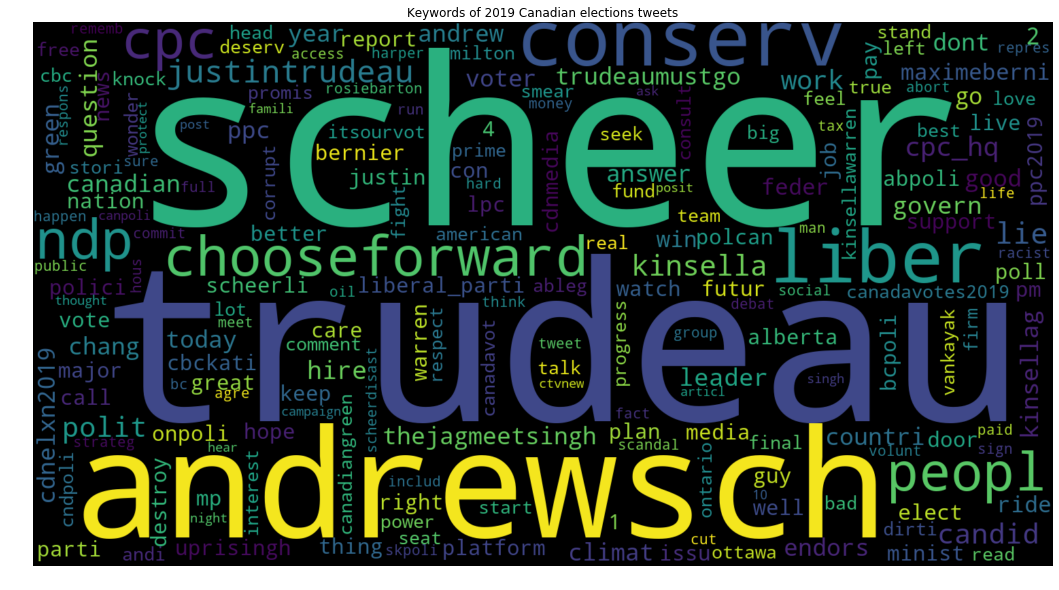

In [ ]:
wordcloud = WordCloud(width = 1500, height = 800).generate_from_frequencies(buildDict)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of 2019 Canadian elections tweets')
plt.axis("off")
plt.show()

The word cloud above shows that most of the word counts relate to liberal and conservative party. Besides the two leaders' name, chooseforard and kinsella also have relative size. The former is the slogan of Trudeau, and Kinsella was said to be hired by conservatives. The popularity of NDP and other parties are not as much as these two parties.

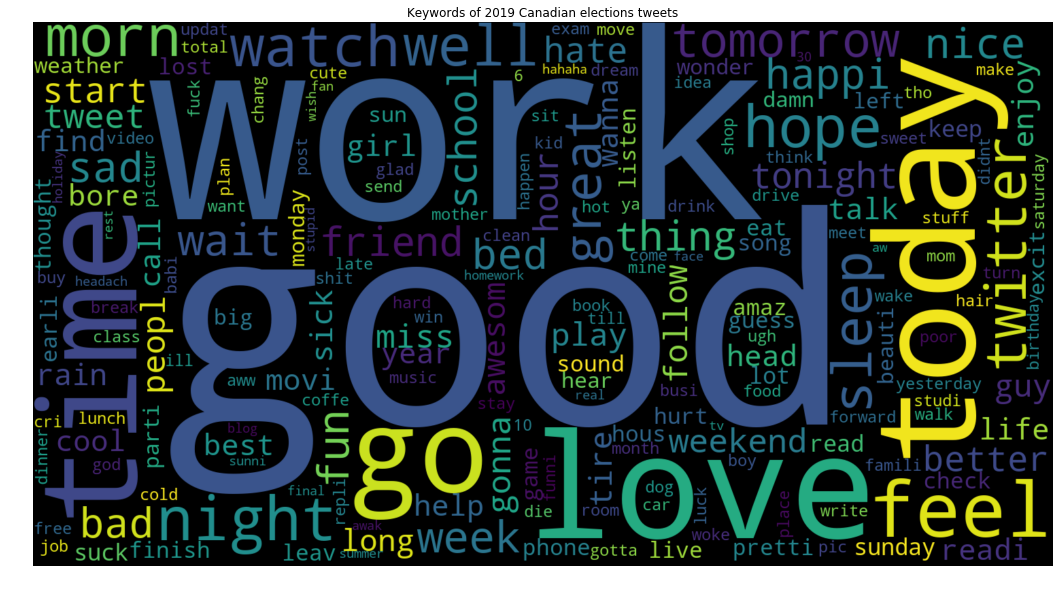

In [ ]:
wordcloud = WordCloud(width = 1500, height = 800).generate_from_frequencies(buildDictGeneric)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of 2019 Canadian elections tweets')
plt.axis("off")
plt.show()

The word cloud above shows the top five popular words are good, work, love, today, and time. It reflects most of people's daily routine and the overall positive emotions. 

### Model Preparation

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
genericTweetsCopy['modi_text'] = genericTweetsCopy.apply(lambda row: ' '.join(row['text_mod_list']), axis=1)
genericY = genericTweetsCopy['class']
genericX = genericTweetsCopy['modi_text']

could also consider date and time? 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(genericX, genericY, test_size=0.3, random_state=53)

# Initialize the 'tfidf_vectorizer'
#tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.7, max_features=3000) 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9) 
# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9)
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

Logic Regression

In [ ]:
#multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}, optional (default=’ovr’)
#solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print('Bag of Words Method')
print("accuracy:   %0.3f" % score)

clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print('TF-IDF Method')
print("accuracy:   %0.3f" % score)

Bag of Words Method
accuracy:   0.728
TF-IDF Method
accuracy:   0.732


Naive Bayes 

In [ ]:
clf = MultinomialNB() 
#clf = ComplementNB()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print('Bag of Words Method')
print("accuracy:   %0.3f" % score)

clf = MultinomialNB() 
#clf = ComplementNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print('TF-IDF Method')
print("accuracy:   %0.3f" % score)

Bag of Words Method
accuracy:   0.726
TF-IDF Method
accuracy:   0.721


In [ ]:
clf =  SVC(gamma='auto')
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print('Bag of Words Method')
print("accuracy:   %0.3f" % score)

clf =  SVC(gamma='auto')
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print('TF-IDF Method')
print("accuracy:   %0.3f" % score)

In [70]:
specialChar = []
hashTag = []
wordsList = []
numberList = []
for index, row in CADElection.iterrows():    
    for word in row['text_mod_list']:
        if word.startswith('@'):
            hashTag.append(word)
        elif word.isalpha():
            wordsList.append(word)
        elif word.isnumeric():
            numberList.append(word)
        else:
            specialChar.append(word) 

In [71]:
print(len(specialChar))
print(len(hashTag))
print(len(wordsList))
print(len(numberList))

3828
2335
25714
572


In [51]:

corpusWords = pd.read_csv("corpus.txt", low_memory = False, names=['corpus', 'sentiment'], sep='\t')

In [3]:
corpus = [
'All bears are lovely',
'Our tea was bad',
'That bear drinks with bear',
'The bear drinks tea',
'We love bears'
]

In [4]:
for i in range(len(corpus)):
    print('Example #{0:d}: "{1:s}"'.format(i+1,corpus[i]))

Example #1: "All bears are lovely"
Example #2: "Our tea was bad"
Example #3: "That bear drinks with bear"
Example #4: "The bear drinks tea"
Example #5: "We love bears"


### Clean Data

Convert to lower case, remove stop words, stem words, etc.

In [5]:
list_lc = []
s1 = ' '
corpus_clean = []
for line in corpus:
    lower_case = line.lower() # lowercase 
    list_lc.append(lower_case)
    tokenizer = RegexpTokenizer(r'\w+')         
    b = tokenizer.tokenize(lower_case)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # remove stop words
    ps = PorterStemmer()
    words_stem = [ps.stem(word) for word in words_rmStop] # stem 
    corpus_clean.append(s1.join(words_stem))

In [6]:
corpus_clean

['bear love', 'tea bad', 'bear drink bear', 'bear drink tea', 'love bear']

In [7]:
for i in range(len(corpus)):
    print('Cleaned example #{0:d}: "{1:s}"'.format(i+1,corpus_clean[i]))

Cleaned example #1: "bear love"
Cleaned example #2: "tea bad"
Cleaned example #3: "bear drink bear"
Cleaned example #4: "bear drink tea"
Cleaned example #5: "love bear"


### Word Frequency (WF)

The "word frequency" (WF) method records the number of times that term occurs in a document.

In [9]:
corpus_clean

['bear love', 'tea bad', 'bear drink bear', 'bear drink tea', 'love bear']

In [10]:
vectorizer = CountVectorizer()
array_WF = vectorizer.fit_transform(corpus_clean).toarray()
#print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(array_WF)

['bad', 'bear', 'drink', 'love', 'tea']
[[0 1 0 1 0]
 [1 0 0 0 1]
 [0 2 1 0 0]
 [0 1 1 0 1]
 [0 1 0 1 0]]


Print results for the "bag of words" (WF) representation.

In [15]:
vectorizer.vocabulary_

{'bear': 1, 'love': 3, 'tea': 4, 'bad': 0, 'drink': 2}

In [16]:
#import operator
#sorted_voc = sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))
sorted_voc = vectorizer.get_feature_names()
print('\t\t', end = '')
for j in range(len(vectorizer.vocabulary_)):
    print('{0:7s}'.format(sorted_voc[j]), end = '')
    #print('{0:7s}'.format(sorted_voc[j][0]), end = '')
print('\t')
for j in range(len(vectorizer.vocabulary_)):
    print('Example #{0:d}'.format(j+1), end = '')
    for i in range(array_WF.shape[0]):
        print('{0:7d}'.format(array_WF[j][i]), end = '')
    print('         "{0:s}"\t'.format(corpus_clean[j]))

		bad    bear   drink  love   tea    	
Example #1      0      1      0      1      0         "bear love"	
Example #2      1      0      0      0      1         "tea bad"	
Example #3      0      2      1      0      0         "bear drink bear"	
Example #4      0      1      1      0      1         "bear drink tea"	
Example #5      0      1      0      1      0         "love bear"	


### Term Frequency (TF)


Term frequency method is used in order to reduce influence of a document length.

The way to calculate it: $\frac{\rm Word ~ Frequency}{\rm total ~ number ~ of ~ words ~ in ~ the ~ document}$.

In [17]:
array_TF = array_WF/array_WF.sum(axis=1,keepdims=True)
print(vectorizer.get_feature_names())
print(array_TF)

['bad', 'bear', 'drink', 'love', 'tea']
[[0.         0.5        0.         0.5        0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333]
 [0.         0.5        0.         0.5        0.        ]]


You get the same results using `TfidfVectorizer`.

In [18]:
vectorizer2 = TfidfVectorizer(use_idf=False, norm="l1")
array_TF1 = vectorizer2.fit_transform(corpus_clean).toarray()
print(vectorizer2.get_feature_names())
print( array_TF1 )

['bad', 'bear', 'drink', 'love', 'tea']
[[0.         0.5        0.         0.5        0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333]
 [0.         0.5        0.         0.5        0.        ]]


Print results for the "term frequency" (TF) representation.

In [19]:
sorted_voc = vectorizer2.get_feature_names()
print('\t     ', end = '')
for j in range(len(vectorizer2.vocabulary_)):
    print('{0:7s}'.format(sorted_voc[j]), end = '')
print('\t')
for j in range(len(vectorizer2.vocabulary_)):
    print('Example #{0:d}'.format(j+1), end = '')
    for i in range(array_TF1.shape[0]):
        print('{0:7.2f}'.format(array_TF1[j][i]), end = '')
    print('         "{0:s}"\t'.format(corpus_clean[j]))

	     bad    bear   drink  love   tea    	
Example #1   0.00   0.50   0.00   0.50   0.00         "bear love"	
Example #2   0.50   0.00   0.00   0.00   0.50         "tea bad"	
Example #3   0.00   0.67   0.33   0.00   0.00         "bear drink bear"	
Example #4   0.00   0.33   0.33   0.00   0.33         "bear drink tea"	
Example #5   0.00   0.50   0.00   0.50   0.00         "love bear"	


### Term Frequency–Inverse Document Frequency (TF-IDF)

The formula that is used to compute the $\mbox{tf-idf }$ of term $t$ is

$\mbox{tf-idf}(d, t) = \mbox{tf}(t) \cdot \mbox{idf}(d, t)$

There are a number of ways to calculate $\mbox{tf}$ and $\mbox{idf}$. According to `TfidfVectorizer` documentation

$\mbox{tf}(t)$ here is word frequency,

if `smooth_idf=False`, 
$\mbox{idf}$ is computed as $\mbox{idf}(d, t) = \log \left[ \frac{n}{{\rm df}(d, t)} \right] + 1$,

if `smooth_idf=True`, 
$\mbox{idf}$ is computed as $\mbox{idf}(d, t) = \log \left[ \frac{ 1+n }{ 1+{\rm df}(d, t) } \right] + 1$,

where $n$ is the total number of documents and $\mbox{df}(d, t)$ is the document frequency.

In [20]:
vectorizer3 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
array_TFIDF = vectorizer3.fit_transform(corpus_clean).toarray()
print( vectorizer3.get_feature_names() )
print( array_TFIDF )

['bad', 'bear', 'drink', 'love', 'tea']
[[0.         1.18232156 0.         1.69314718 0.        ]
 [2.09861229 0.         0.         0.         1.69314718]
 [0.         2.36464311 1.69314718 0.         0.        ]
 [0.         1.18232156 1.69314718 0.         1.69314718]
 [0.         1.18232156 0.         1.69314718 0.        ]]


Print results for the "term frequency - inverse document frequency" (TF-IDF) representation.

In [21]:
sorted_voc = vectorizer3.get_feature_names()
print('\t     ', end = '')
for j in range(len(vectorizer3.vocabulary_)):
    print('{0:7s}'.format(sorted_voc[j]), end = '')
print('\t')
for j in range(len(vectorizer3.vocabulary_)):
    print('Example #{0:d}'.format(j+1), end = '')
    for i in range(array_TFIDF.shape[0]):
        print('{0:7.2f}'.format(array_TFIDF[j][i]), end = '')
    print('         "{0:s}"\t'.format(corpus_clean[j]))

	     bad    bear   drink  love   tea    	
Example #1   0.00   1.18   0.00   1.69   0.00         "bear love"	
Example #2   2.10   0.00   0.00   0.00   1.69         "tea bad"	
Example #3   0.00   2.36   1.69   0.00   0.00         "bear drink bear"	
Example #4   0.00   1.18   1.69   0.00   1.69         "bear drink tea"	
Example #5   0.00   1.18   0.00   1.69   0.00         "love bear"	


### Word Embedding

https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795

Here we use `Word2Vec` as example.
There are a lot of ways to use the word embedding as features, here we use joining (averaging) vectors from the words from sentence.

In [32]:
tokenized_sentences = [sentence.split() for sentence in corpus_clean]
model = word2vec.Word2Vec(tokenized_sentences, size=100, min_count=1)

In [94]:
model.most_similar(['love'])

2019-11-05 16:31:55,582 [26252] WARNING  py.warnings:110: [JupyterRequire] C:\Users\OLEKSANDRRomanko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.



[('tea', 0.04989343136548996),
 ('bear', -0.03948143869638443),
 ('bad', -0.04141325503587723),
 ('drink', -0.06769246608018875)]

In [49]:
model['love'].reshape((1, 100))

/Users/pingwu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-4.5096301e-03,  1.0776015e-03,  2.3104686e-03,  3.7820239e-03,
         1.5000100e-03, -6.6087674e-04,  1.3785056e-03,  1.1966325e-03,
        -1.6633301e-03,  3.0567958e-03,  8.8104384e-04, -2.5930733e-03,
        -2.1055257e-03,  1.5693693e-03,  4.0840977e-03,  3.7100532e-03,
        -4.1637695e-03, -2.4407684e-04, -3.6076580e-03, -4.0282798e-03,
         1.2396622e-03,  2.3122001e-03, -6.1124103e-04, -1.1780466e-03,
         2.1181912e-03, -4.7766850e-03, -3.7995996e-03,  2.7426230e-04,
        -3.3462713e-03, -1.8063164e-03,  3.1984197e-03,  8.4785663e-04,
        -8.8840068e-05, -2.0279523e-03, -2.7868808e-03, -2.9570975e-03,
         1.6235323e-04,  1.4239192e-03, -3.9102710e-03, -8.0130203e-06,
        -3.0255269e-03, -1.2272932e-03, -2.5831209e-03,  1.4058248e-03,
         2.7082025e-03,  4.6033827e-03,  1.8440962e-03, -2.0039440e-04,
         6.0292627e-05, -4.6431632e-03,  3.1464512e-03, -3.3449712e-03,
        -1.6436554e-03,  2.3879504e-03, -2.6112557e-03, -3.60327

In [55]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split(' ')
    for word in text:
        vec += model[word].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [56]:
corpus_clean

['bear love', 'tea bad', 'bear drink bear', 'bear drink tea', 'love bear']

In [57]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 100) for z in corpus_clean])

/Users/pingwu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [59]:
print( array_wordEmbedding )

[[-9.95494192e-04  2.14229617e-03  1.00282682e-03  2.30378966e-03
  -8.36473424e-04 -2.57339864e-03  1.59368583e-03  1.05653459e-03
  -3.01944680e-03  2.44038715e-03  2.82365625e-03 -2.24264094e-03
   1.36526139e-03  1.20678419e-03  3.56960949e-03  3.29339586e-03
   2.51698773e-04 -1.23027073e-03 -4.21406853e-03 -4.08171886e-03
   7.97631496e-04 -1.16096553e-03 -1.95844870e-03 -2.65685952e-03
  -6.01756270e-04 -1.44713558e-05 -6.34645461e-04  1.57335617e-03
  -4.47480939e-04 -3.12123448e-03  2.81179172e-03 -2.81706394e-04
  -1.59697889e-03 -1.42891498e-03 -1.91793521e-03 -4.35673050e-04
  -6.55694595e-04  2.81806762e-03 -3.79118766e-03  4.89779380e-04
  -2.86811881e-03  2.06357916e-04 -2.32828106e-03  2.30017578e-03
   3.03848495e-03  1.08424074e-03 -1.69115840e-04  8.65153634e-04
   2.33931500e-03 -3.80504271e-03  3.38211865e-03 -2.68545514e-03
   2.67913449e-04  3.49915738e-03  5.33820363e-04  5.95182646e-05
  -4.95149288e-05 -5.64630151e-04 -4.62433370e-03 -2.47629781e-03
  -2.15658